<a href="https://colab.research.google.com/github/iainwo/life-of-iain/blob/main/0_1_1_method_of_exhaustion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Basic Concepts of Calc

1. measure the area of a region
2. measure steepness of line

# The Area of a Region Can Be Measured Using the Method of Exhaustion

Historical method by greeks, consisting of:

1. find a region to measure
2. approximate the region of #1 with a easily measured polygon
3. improve the approximation by increasing the number of sides on the polygon
4. repeat

# Claim - The Area Under a Parabolic Segment is Exactly: $A = \frac{b^3}{3}$

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# number of points
x_lb = 0
x_ub = 10
n = 11

# parabola
f = lambda x: x**2
x = np.linspace(x_lb, x_ub, n)
y = f(x)

# ordinates
xi = np.full((n), x_ub//2)
ordinate_i = np.linspace(x_lb, f(xi[-1]), n)

xj = np.full((n), x_ub)
ordinate_j = np.linspace(0, f(xj[-1]), n)

# region approximations
f_lb = lambda x: np.power(np.floor(x), 2) # lower bound
y_lb = f_lb(x)

f_ub = lambda x: np.ceil(x)**2 # upper bound
y_ub = f_ub(x)

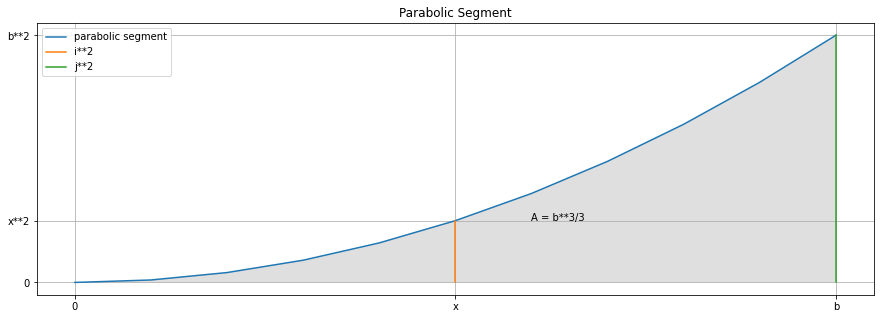

In [11]:
plt.figure(figsize=(15, 5))

plt.plot(x, y, label="parabolic segment")
plt.fill_between(x, y, alpha=0.25, facecolor="gray")
plt.plot(xi, ordinate_i, label="i**2")
plt.plot(xj, ordinate_j, label="j**2")
plt.text(1 + xi[0], ordinate_i[-1], "A = b**3/3")
plt.xticks([0, xi[0], xj[0]], ["0", "x", "b"])
plt.yticks([0, ordinate_i[-1], ordinate_j[-1]], ["0", "x**2", "b**2"])
plt.title("Parabolic Segment")
plt.grid(True)
plt.legend()

plt.show()

# Reason - the Method of Exhaustion show that the Area Under a Parabolic Segment is $A = \frac{b^3}{3}$

## STEP 1 - find a region to measure

This region is defined by the area underneath the parabolic segment defined in "Claim - The Area Under a Parabolic Segment is Exactly: $A = \frac{b^3}{3}$"

## STEP 2  approximate the region with a easily measured polygon

### Visualizing the Approximations

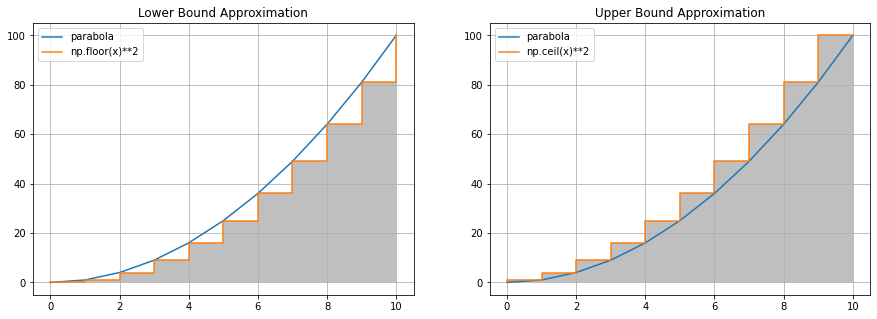

In [12]:
afig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Parabolic Segments')

# lower bound region approximation
ax[0].plot(x, y, label="parabola")
ax[0].plot(x, y_lb, label="np.floor(x)**2", drawstyle='steps-post')
ax[0].set_title("Lower Bound Approximation")
ax[0].fill_between(x, y_lb, alpha=0.5, facecolor="gray", step="post")
ax[0].grid(True)
ax[0].legend()

# upper bound region approximation
ax[1].plot(x, y, label="parabola")
ax[1].plot(x, y_ub, label="np.ceil(x)**2", drawstyle='steps-pre')
ax[1].set_title("Upper Bound Approximation")
ax[1].fill_between(x, y_ub, alpha=0.5, facecolor="gray", step="pre")
ax[1].grid(True)
ax[1].legend()

plt.show()

### Quantifying the "Easily Measured"  Approximations

The lower and upper bound step function approixmations can be broken into rectangular pieces, reasoned about, and then ultimately used to form a measurement of the approximation's area.

In [13]:
step = (x_ub//10)

# rectangle 2
x_r1 = x[step: 3*step]
y_r1 = f_ub(x_r1)

# rectangle 3
x_r2 = x[3*step: 5*step]
y_r2 = f_ub(x_r2)

# rectangle 1
x_r3 = x[8*step: 10*step]
y_r3 = f_ub(x_r3)

In [14]:
# create logical axis
x_log = np.linspace(x_lb, x_ub, n)
x_log_labels = [f"({i:.0f}/n)*b" for i in x_log[:-1]] + ["(n/n)*b"]

y_log = f(x_log)
y_log_labels = [f"({i:.0f}/n*b)**2" for i in x_log[:-1]] + ["(n/n*b)**2"]

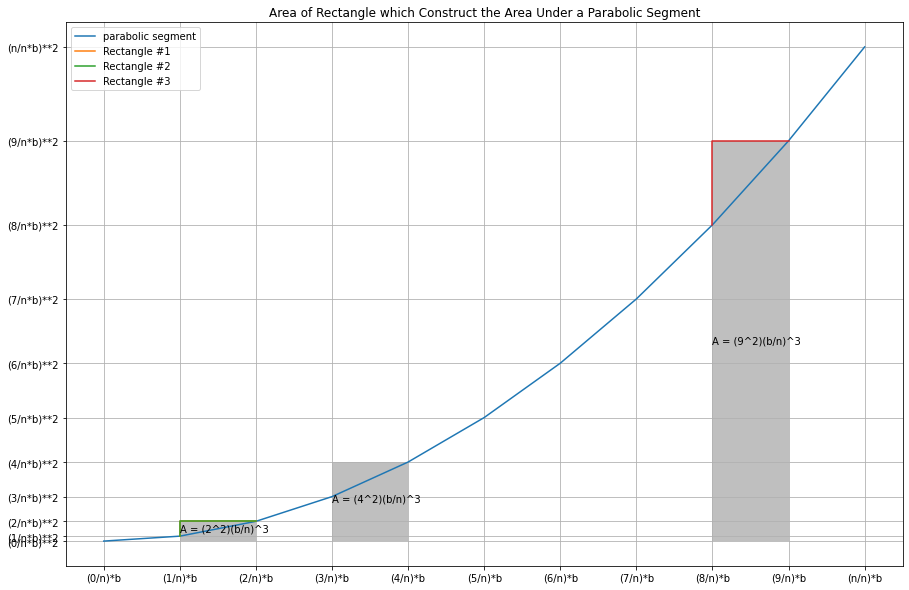

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(x, y, label="parabolic segment")

# rectangle 1
plt.plot(x_r1, y_r1, label="Rectangle #1", drawstyle='steps-pre')
plt.fill_between(x_r1, y_r1, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r1[0], y_r1[-1]//2, "A = (2^2)(b/n)^3")

# rectangle 2
plt.plot(x_r1, y_r1, label="Rectangle #2", drawstyle='steps-pre')
plt.fill_between(x_r2, y_r2, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r2[0], y_r2[-1]//2, "A = (4^2)(b/n)^3")

# rectangle 3
plt.plot(x_r3, y_r3, label="Rectangle #3", drawstyle='steps-pre')
plt.fill_between(x_r3, y_r3, alpha=0.5, facecolor="gray", step="pre")
plt.text(x_r3[0], y_r3[-1]//2, "A = (9^2)(b/n)^3")

plt.xticks(x_log, x_log_labels)
plt.yticks(y_log, y_log_labels)

plt.title("Area of Rectangle which Construct the Area Under a Parabolic Segment")
plt.grid(True)
plt.legend()
plt.show()

#### Area of a Rectangle
To get the area of each rectangular section the the length (y-axis) and width (x-axis) of each rectangle is multiplied.

It turns out, that the measured area of one rectangle relative to another, are the exact same except for one varying factor $k^2$ - where $k$ is proportionate to magnitude of the x-coordinate.

The common formula between rectangle area formulas is

\begin{align}
        A = k^2(\frac{b}{n})^3
\end{align}

This is produced by the fact that each rectangle is of width $\frac{b}{n}$ and height $k^2(\frac{b}{n})^2$.

#### Area Under Step Function

The area under the uppper bound step function can be calculated by summing the individual area of each rectangular piece.

This can indeed be done individually - by finding the height and width of each rectangle, multiplying them and then summing in them; however there is a shorter solution.

Instead, the area under the upper bound step function can be summed by summing across the general formula for calculating the area of each rectangle $A = k^2(\frac{b}{n})^3$.

Let $S_{n}$ be the total area underneath the step function.

\begin{align}
        S_{n} = k_{0}^2(\frac{b}{n})^3 + k_{1}^2(\frac{b}{n})^3 + ... + k_{n}^2(\frac{b}{n})^3
\end{align}

By factoring out the common $(\frac{b}{n})^3$ term, the sum turns into distributed multiplication:

\begin{align}
        S_{n} = (\frac{b}{n})^3*(k_{0}^2 + k_{1}^2 + ... + k_{n}^2)
\end{align}

This also is true of the lower bound step functions' area. Let $s_{n}$ be the area of the lower bound step function:

\begin{align}
        s_{n} = (\frac{b}{n})^3*(k_{0}^2 + k_{1}^2 + ... + k_{n-1}^2)
\end{align}

#### Simplifying the Step Function Area Formula

The sum of squares can be rewritten:

\begin{align}
        \frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6} = (1^2 + 2^2 + ... + n^2)
\end{align}

In turn, the area of lower and upper bounds can be measured, in the fashion (this is for the upper bound):

\begin{align}
        S_{n} = (\frac{b}{n})^3 * (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}

## STEP 3 improve the approximation by increasing the number of sides on the polygon

#### Expressing the Approximations in Relation into the Area

Let $A$ be the area underneath the parabolic segment, it can be said that that area is bounded by the step functions.

\begin{align}
        s_{n} < A < S_{n}
\end{align}

This can be made more descriptive by, replacing their symbols with their corresponding area calculations

\begin{align}
        (\frac{b}{n})^3 * (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6} - n^2) < (\frac{b}{n})^3 * (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}

This can be simplified to

\begin{align}
        (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6} - n^2) < (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}

This equality can be expanded by observing that $\frac{n^3}{3}$ is bigger than left side and smaller than the right equation.

\begin{align}
        (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6} - n^2) < \frac{n^3}{3} < (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}

This can be further modified by adding back the $\frac{b^3}{n^3}$ term that was removed previously.

\begin{align}
        s_{n} < \frac{b^3}{3} < S_{n}
\end{align}

TODO

\begin{align}
        (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6} - n^2) < \frac{n^3}{3}
\end{align}
\begin{align}
        \frac{n^2}{2} + \frac{n}{6} - n^2 < 0
\end{align}
\begin{align}
        -\frac{n^2}{2} + \frac{n}{6} < 0
\end{align}
\begin{align}
        \frac{n}{6} < \frac{n^2}{2}
\end{align}
\begin{align}
        \frac{n}{3} < n^2
\end{align}
\begin{align}
        n < 3n^2
\end{align}
\begin{align}
        \frac{n}{n^2} < 3
\end{align}
\begin{align}
        \frac{1}{n} < 3
\end{align}
Which is true when $n >= 1$.


\begin{align}
        \frac{b^3}{3} < (\frac{b}{n})^3 * (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}
\begin{align}
        \frac{1}{3} < \frac{1}{n^3} * (\frac{n^3}{3} + \frac{n^2}{2} + \frac{n}{6})
\end{align}
\begin{align}
        1 < \frac{1}{n^3} * (n^3 + \frac{3n^2}{2} + \frac{n}{2})
\end{align}
\begin{align}
        1 <  (1 + \frac{3}{2n} + \frac{1}{2n^2})
\end{align}
\begin{align}
        0 <  \frac{3}{2n} + \frac{1}{2n^2}
\end{align}
\begin{align}
        0 <  \frac{3n}{2} + \frac{1}{2}
\end{align}
\begin{align}
        0 <  3n + 1
\end{align}
\begin{align}
        -\frac{1}{3} < n
\end{align}

Since the inequality expresses that the difference between the upper bound and $\frac{b^3}{3}$ monotonically decreases the larger $n$ gets, this 